In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cov = pd.read_csv('project1/covid_19_data.csv')

In [3]:
cov.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              156292 non-null  int64  
 1   ObservationDate  156292 non-null  object 
 2   Province/State   111979 non-null  object 
 3   Country/Region   156292 non-null  object 
 4   Last Update      156292 non-null  object 
 5   Confirmed        156292 non-null  float64
 6   Deaths           156292 non-null  float64
 7   Recovered        156292 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


In [5]:
cov.describe()

,SNo,Confirmed,Deaths,Recovered
count,156292.000000,1.562920e+05,156292.000000,1.562920e+05
mean,78146.500000,2.844340e+04,966.090273,1.793232e+04
std,45117.758473,8.809800e+04,3278.110680,9.813018e+04
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,39073.750000,3.900000e+02,5.000000,1.000000e+01
50%,78146.500000,3.410000e+03,67.000000,7.570000e+02
75%,117219.250000,1.597875e+04,486.000000,6.270000e+03
max,156292.000000,1.867721e+06,45974.000000,4.174884e+06


# deal with observationdate

In [6]:
cov['ObservationDate'].min(),cov['ObservationDate'].max()

('01/22/2020', '11/15/2020')

In [7]:
cov['ObservationDate'].value_counts()

11/14/2020    758
11/12/2020    758
11/13/2020    758
11/15/2020    758
11/10/2020    746
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: ObservationDate, Length: 299, dtype: int64

# deal with confirmed/deaths/recovered

In [8]:
cdr = ['Confirmed','Deaths','Recovered']
cov[cdr].describe()

,Confirmed,Deaths,Recovered
count,1.562920e+05,156292.000000,1.562920e+05
mean,2.844340e+04,966.090273,1.793232e+04
std,8.809800e+04,3278.110680,9.813018e+04
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,3.900000e+02,5.000000,1.000000e+01
50%,3.410000e+03,67.000000,7.570000e+02
75%,1.597875e+04,486.000000,6.270000e+03
max,1.867721e+06,45974.000000,4.174884e+06


In [9]:
cov[cov['Confirmed']<0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
146493,146494,11/02/2020,Unknown,Colombia,2020-11-03 06:00:16,-302844.0,0.0,0.0


In [10]:
cov[cov['Deaths']<0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
117488,117489,09/24/2020,Unknown,Colombia,2020-09-25 04:23:00,0.0,-178.0,-12684.0
140535,140536,10/25/2020,Unknown,Colombia,2020-10-26 04:25:02,0.0,-154.0,-8072.0


In [11]:
cov[cov['Recovered']<0]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
117488,117489,09/24/2020,Unknown,Colombia,2020-09-25 04:23:00,0.0,-178.0,-12684.0
140535,140536,10/25/2020,Unknown,Colombia,2020-10-26 04:25:02,0.0,-154.0,-8072.0
144258,144259,10/30/2020,Unknown,Colombia,2020-10-31 04:24:44,0.0,505.0,-854405.0


In [12]:
colombia = cov[cov['Country/Region']=='Colombia']
minus_date = []
minus_date.extend(colombia[colombia['Confirmed']<0]['ObservationDate'])
minus_date.extend(colombia[colombia['Deaths']<0]['ObservationDate'])
minus_date.extend(colombia[colombia['Recovered']<0]['ObservationDate'])
minus_date = set(minus_date)
minus_date

{'09/24/2020', '10/25/2020', '10/30/2020', '11/02/2020'}

In [13]:
cov[(cov['Province/State']=='Unknown')&(cov['Country/Region']=='Colombia')]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
33167,33168,06/01/2020,Unknown,Colombia,2020-06-02 02:33:08,1087.0,0.0,0.0
33830,33831,06/02/2020,Unknown,Colombia,2020-06-03 02:33:13,50.0,0.0,0.0
34494,34495,06/03/2020,Unknown,Colombia,2020-06-04 02:33:14,51.0,0.0,0.0
35158,35159,06/04/2020,Unknown,Colombia,2020-06-05 02:33:06,56.0,0.0,0.0
35836,35837,06/05/2020,Unknown,Colombia,2020-06-06 02:33:00,62.0,0.0,0.0
...,...,...,...,...,...,...,...,...
153200,153201,11/11/2020,Unknown,Colombia,2020-11-12 05:25:55,0.0,0.0,0.0
153955,153956,11/12/2020,Unknown,Colombia,2020-11-13 05:25:30,0.0,0.0,1.0
154713,154714,11/13/2020,Unknown,Colombia,2020-11-14 05:25:37,0.0,178.0,7650.0
155471,155472,11/14/2020,Unknown,Colombia,2020-11-15 05:26:53,0.0,160.0,8236.0


In [14]:
cov['Confirmed'] = cov['Confirmed'].apply(lambda x:-x if x<0 else x)
cov['Deaths'] = cov['Deaths'].apply(lambda x:-x if x<0 else x)
cov['Recovered'] = cov['Recovered'].apply(lambda x:-x if x<0 else x)


In [15]:
cov.describe()

,SNo,Confirmed,Deaths,Recovered
count,156292.000000,1.562920e+05,156292.000000,1.562920e+05
mean,78146.500000,2.844727e+04,966.094522,1.794352e+04
std,45117.758473,8.809675e+04,3278.109428,9.812814e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,39073.750000,3.900000e+02,5.000000,1.000000e+01
50%,78146.500000,3.410000e+03,67.000000,7.580000e+02
75%,117219.250000,1.598125e+04,486.000000,6.270000e+03
max,156292.000000,1.867721e+06,45974.000000,4.174884e+06


# deal with Null

In [16]:
cov.isnull().sum()/len(cov)

SNo                0.000000
ObservationDate    0.000000
Province/State     0.283527
Country/Region     0.000000
Last Update        0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
dtype: float64

In [17]:
cov[cov['Province/State'].isnull()]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0
74,75,01/23/2020,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
155699,155700,11/15/2020,NaN,West Bank and Gaza,2020-11-16 05:25:57,63031.0,565.0,54346.0
155700,155701,11/15/2020,NaN,Western Sahara,2020-11-16 05:25:57,10.0,1.0,8.0
155701,155702,11/15/2020,NaN,Yemen,2020-11-16 05:25:57,2072.0,605.0,1394.0
155702,155703,11/15/2020,NaN,Zambia,2020-11-16 05:25:57,17123.0,353.0,16137.0


In [18]:
cov[cov['Province/State'].notnull()]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
156287,156288,11/15/2020,Zaporizhia Oblast,Ukraine,2020-11-16 05:25:57,18484.0,164.0,3021.0
156288,156289,11/15/2020,Zeeland,Netherlands,2020-11-16 05:25:57,5041.0,86.0,0.0
156289,156290,11/15/2020,Zhejiang,Mainland China,2020-11-16 05:25:57,1291.0,1.0,1279.0
156290,156291,11/15/2020,Zhytomyr Oblast,Ukraine,2020-11-16 05:25:57,22225.0,368.0,12266.0


In [19]:
cov.drop('Province/State',axis=1,inplace=True)

# deal with country/region

In [20]:
country_region = list(cov['Country/Region'].unique())
print(f'Toal amount of countries: {len(country_region)}')
print(country_region)

Toal amount of countries: 226
['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', '

In [21]:
cov['Country/Region'].replace("('St. Martin',)",'St. Martin')

0         Mainland China
1         Mainland China
2         Mainland China
3         Mainland China
4         Mainland China
               ...      
156287           Ukraine
156288       Netherlands
156289    Mainland China
156290           Ukraine
156291       Netherlands
Name: Country/Region, Length: 156292, dtype: object

In [22]:
cov['Country/Region'] = cov['Country/Region'].apply(lambda x: x.replace("('St. Martin',)",'St. Martin'))
cov['Country/Region'].replace("Republic of the Congo",'Congo (Brazzaville)')
country_region = list(cov['Country/Region'].unique())
print(f'Toal amount of countries: {len(country_region)}')
print(country_region)

Toal amount of countries: 225
['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', '

# deal with last update

In [23]:
cov['Last Update']

0             1/22/2020 17:00
1             1/22/2020 17:00
2             1/22/2020 17:00
3             1/22/2020 17:00
4             1/22/2020 17:00
                 ...         
156287    2020-11-16 05:25:57
156288    2020-11-16 05:25:57
156289    2020-11-16 05:25:57
156290    2020-11-16 05:25:57
156291    2020-11-16 05:25:57
Name: Last Update, Length: 156292, dtype: object

In [24]:
cov['Last Update'] = cov['Last Update'].apply(lambda x: x.split(' ')[0])
cov['Last Update'] = cov['Last Update'].apply(lambda x: x.split('T')[0])
cov['Last Update'] = cov['Last Update'].apply(lambda x: x.replace('/','-'))
cov['temp'] = cov['Last Update'].apply(lambda x: 1 if x.startswith('2020') else 0)
date_replace_list = list(cov[cov['temp']==0]['Last Update'].value_counts().index)
date_replace_list

['3-8-20',
 '4-6-20',
 '4-4-20',
 '4-2-20',
 '1-31-2020',
 '1-30-20',
 '1-29-20',
 '2-1-2020',
 '1-28-20',
 '1-27-20',
 '1-26-20',
 '1-23-20',
 '1-25-20',
 '1-24-20',
 '1-22-2020']

In [25]:
temp = pd.DataFrame({'Date':date_replace_list})
temp['year'] = 2020
temp['month'] = [i.split('-')[0] for i in temp['Date']]
temp['date'] = [i.split('-')[1] for i in temp['Date']]
temp['month'] = [str(0)+str(i) for i in temp['month']]
temp['month'] = [str(0)+str(i) if len(i)<2 else i for i in temp['month'] ]
temp['fix'] = temp['year'].astype('str')+'-'+temp['month'].astype('str')+'-'+temp['date'].astype('str')
temp.drop(['year','month','date'],axis=1,inplace=True)

In [26]:
date_change_dict = {}
for i in temp.index:
    date_change_dict.update({temp['Date'][i]:temp['fix'][i]})
date_change_dict

{'3-8-20': '2020-03-8',
 '4-6-20': '2020-04-6',
 '4-4-20': '2020-04-4',
 '4-2-20': '2020-04-2',
 '1-31-2020': '2020-01-31',
 '1-30-20': '2020-01-30',
 '1-29-20': '2020-01-29',
 '2-1-2020': '2020-02-1',
 '1-28-20': '2020-01-28',
 '1-27-20': '2020-01-27',
 '1-26-20': '2020-01-26',
 '1-23-20': '2020-01-23',
 '1-25-20': '2020-01-25',
 '1-24-20': '2020-01-24',
 '1-22-2020': '2020-01-22'}

In [27]:
for key,value in date_change_dict.items():
    cov['Last Update'] = cov['Last Update'].apply(lambda x: x.replace(key,value))
cov['Last Update']

0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
156287    2020-11-16
156288    2020-11-16
156289    2020-11-16
156290    2020-11-16
156291    2020-11-16
Name: Last Update, Length: 156292, dtype: object

# sum the confirmed/deaths/recoverd by date and country/region

In [28]:
cov['confirmed_sum'] = 0
cov['deaths_sum'] = 0
cov['recovered_sum'] = 0

In [29]:
sum_data = cov.groupby(['ObservationDate','Country/Region'])['Confirmed','Deaths','Recovered'].sum()
sum_data.head(30)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Deaths  Recovered
ObservationDate Country/Region                              
01/22/2020      Hong Kong             0.0     0.0        0.0
                Japan                 2.0     0.0        0.0
                Macau                 1.0     0.0        0.0
                Mainland China      547.0    17.0       28.0
                South Korea           1.0     0.0        0.0
                Taiwan                1.0     0.0        0.0
                Thailand              2.0     0.0        0.0
                US                    1.0     0.0        0.0
01/23/2020      Australia             0.0     0.0        0.0
                Brazil                0.0     0.0        0.0
                Colombia              0.0     0.0        0.0
                Hong Kong             2.0     0.0        0.0
                Japan                 1.0     0.0        0.0
                Macau                 2.0     0.0        0.0
                Mainland China      639.0    18.0       30.0
                Malaysia              0.0     0.0        0.0
                Mexico                0.0     0.0        0.0
                Philippines           0.0     0.0        0.0
                Singapore             1.0     0.0        0.0
                South Korea           1.0     0.0        0.0
                Taiwan                1.0     0.0        0.0
                Thailand              3.0     0.0        0.0
                US                    1.0     0.0        0.0
                Vietnam               2.0     0.0        0.0
01/24/2020      France                2.0     0.0        0.0
                Hong Kong             2.0     0.0        0.0
                Japan                 2.0     0.0        0.0
                Macau                 2.0     0.0        0.0
                Mainland China      916.0    26.0       36.0
                Singapore             3.0     0.0        0.0

In [30]:
sum_data = sum_data.unstack()
sum_data.head()

Confirmed                                             \
Country/Region   Azerbaijan Afghanistan Albania Algeria Andorra Angola   
ObservationDate                                                          
01/22/2020              NaN         NaN     NaN     NaN     NaN    NaN   
01/23/2020              NaN         NaN     NaN     NaN     NaN    NaN   
01/24/2020              NaN         NaN     NaN     NaN     NaN    NaN   
01/25/2020              NaN         NaN     NaN     NaN     NaN    NaN   
01/26/2020              NaN         NaN     NaN     NaN     NaN    NaN   

                                                             ... Recovered  \
Country/Region  Antigua and Barbuda Argentina Armenia Aruba  ...   Vanuatu   
ObservationDate                                              ...             
01/22/2020                      NaN       NaN     NaN   NaN  ...       NaN   
01/23/2020                      NaN       NaN     NaN   NaN  ...       NaN   
01/24/2020                      NaN       NaN     NaN   NaN  ...       NaN   
01/25/2020                      NaN       NaN     NaN   NaN  ...       NaN   
01/26/2020                      NaN       NaN     NaN   NaN  ...       NaN   

                                                                   \
Country/Region  Vatican City Venezuela Vietnam West Bank and Gaza   
ObservationDate                                                     
01/22/2020               NaN       NaN     NaN                NaN   
01/23/2020               NaN       NaN     0.0                NaN   
01/24/2020               NaN       NaN     0.0                NaN   
01/25/2020               NaN       NaN     0.0                NaN   
01/26/2020               NaN       NaN     0.0                NaN   

                                                      \
Country/Region  Western Sahara Yemen Zambia Zimbabwe   
ObservationDate                                        
01/22/2020                 NaN   NaN    NaN      NaN   
01/23/2020                 NaN   NaN    NaN      NaN   
01/24/2020                 NaN   NaN    NaN      NaN   
01/25/2020                 NaN   NaN    NaN      NaN   
01/26/2020                 NaN   NaN    NaN      NaN   

                                                
Country/Region  occupied Palestinian territory  
ObservationDate                                 
01/22/2020                                 NaN  
01/23/2020                                 NaN  
01/24/2020                                 NaN  
01/25/2020                                 NaN  
01/26/2020                                 NaN  

[5 rows x 675 columns]

In [31]:
confirmed = sum_data['Confirmed']
deaths = sum_data['Deaths']
recovered = sum_data['Recovered']

In [32]:
confirmed.head()

Country/Region,Azerbaijan,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
ObservationDate,,,,,,,,,,,,,,,,,,,,,
01/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/23/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
01/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
01/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
01/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
deaths.head()

Country/Region,Azerbaijan,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
ObservationDate,,,,,,,,,,,,,,,,,,,,,
01/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/23/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
recovered.head()

Country/Region,Azerbaijan,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,occupied Palestinian territory
ObservationDate,,,,,,,,,,,,,,,,,,,,,
01/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/23/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/24/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/25/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/26/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
taiwan_confirmed = confirmed['Taiwan']
taiwan_deaths = deaths['Taiwan']
taiwan_recovered = recovered['Taiwan']
taiwan = pd.DataFrame({'confirmed':taiwan_confirmed,'deaths':taiwan_deaths,'recovered':taiwan_recovered})
taiwan


,confirmed,deaths,recovered
ObservationDate,,,
01/22/2020,1.0,0.0,0.0
01/23/2020,1.0,0.0,0.0
01/24/2020,3.0,0.0,0.0
01/25/2020,3.0,0.0,0.0
01/26/2020,4.0,0.0,0.0
...,...,...,...
11/11/2020,584.0,7.0,528.0
11/12/2020,589.0,7.0,532.0
11/13/2020,597.0,7.0,533.0


In [36]:
import matplotlib.dates as mdates
import matplotlib.ticker as tkr 
import matplotlib as mpl

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

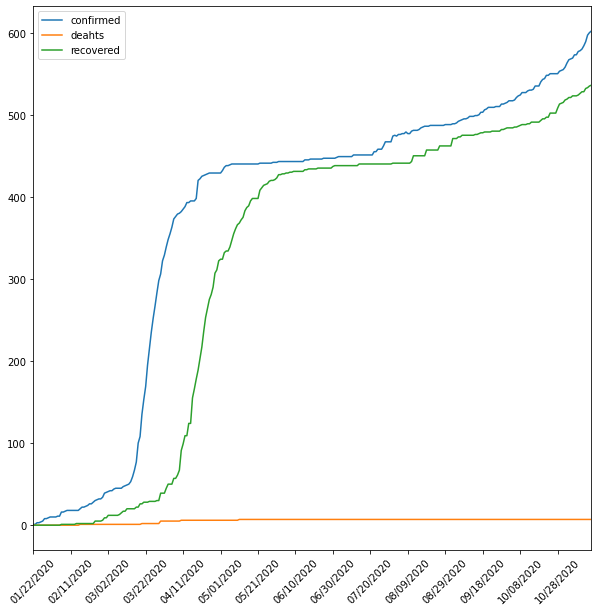

In [37]:
plt.figure(figsize = (10,10))



plt.plot(taiwan_confirmed,label = 'confirmed')
plt.plot(taiwan_deaths,label = 'deahts')
plt.plot(taiwan_recovered,label = 'recovered')



plt.xticks(rotation=45)
plt.xlim(taiwan_confirmed.index[0],taiwan_confirmed.index[-1])
plt.xticks(taiwan_confirmed.index[::20])





plt.legend()
plt.show()

# first countries got the pendamic 

In [41]:
cov.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,temp,confirmed_sum,deaths_sum,recovered_sum
0,1,01/22/2020,Mainland China,2020-01-22,1.0,0.0,0.0,0,0,0,0
1,2,01/22/2020,Mainland China,2020-01-22,14.0,0.0,0.0,0,0,0,0
2,3,01/22/2020,Mainland China,2020-01-22,6.0,0.0,0.0,0,0,0,0
3,4,01/22/2020,Mainland China,2020-01-22,1.0,0.0,0.0,0,0,0,0
4,5,01/22/2020,Mainland China,2020-01-22,0.0,0.0,0.0,0,0,0,0


In [50]:
first = cov[cov['ObservationDate']==min(cov['ObservationDate'])]['Country/Region'].unique()
first

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea'], dtype=object)

# first patient confirmed/dead/recovered

In [69]:
cov[cov['Recovered']>0][['ObservationDate','Confirmed','Recovered','Deaths']].groupby('ObservationDate').min()

,Confirmed,Recovered,Deaths
ObservationDate,,,
01/22/2020,444.0,28.0,17.0
01/23/2020,32.0,2.0,0.0
01/24/2020,20.0,1.0,0.0
01/25/2020,18.0,1.0,0.0
01/26/2020,4.0,1.0,0.0
...,...,...,...
11/11/2020,0.0,1.0,0.0
11/12/2020,0.0,1.0,0.0
11/13/2020,0.0,1.0,0.0


# first confirmed/recoverd/deaths countries on the earliest day

In [84]:
first_list = []
for i in list(cov[(cov['ObservationDate']=='01/22/2020')&(cov['Confirmed']>0)]['Country/Region']):
    if i not in first_list:
        first_list.append(i)
first_list

['Mainland China', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea']

In [86]:
first_list = []
for i in list(cov[(cov['ObservationDate']=='01/22/2020')&(cov['Recovered']>0)]['Country/Region']):
    if i not in first_list:
        first_list.append(i)
first_list

['Mainland China']

In [87]:
first_list = []
for i in list(cov[(cov['ObservationDate']=='01/22/2020')&(cov['Deaths']>0)]['Country/Region']):
    if i not in first_list:
        first_list.append(i)
first_list

['Mainland China']

In [ ]:
# 